# Data Exploration and Visualization

Codes implemented in this Colab are inspired and taken from the following blogs:

https://medium.com/analytics-vidhya/implementation-of-a-movies-recommender-from-implicit-feedback-6a810de173ac

https://medium.com/radon-dev/als-implicit-collaborative-filtering-5ed653ba39fe

https://github.com/benfred/implicit

https://github.com/MohammedAlawami/Movielens-Dataset/blob/master/movielens_project.ipynb

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [3]:
path_to_data = "Data/"

In [4]:
movies_df = pd.read_csv(path_to_data +
    'movies.dat',
    sep='::',
    names=['MovieID','Title','Genres'],
    engine='python',
    encoding='latin-1',
    header=None
)
users_df = pd.read_csv(path_to_data +
    'users.dat',
    sep='::',
    names=['UserID','Gender','Age', 'Occupation', 'zip-code'],
    engine='python',
    encoding='latin-1',
    header=None
)
ratings_df = pd.read_csv(path_to_data +
    'ratings.dat',
    sep='::',
    names=['UserID','MovieID','Rating', 'Timestamp'],
    parse_dates=['Timestamp'],
    engine='python',
    encoding='latin-1',
    header=None
)

In [5]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
users_df.head()

,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
movie_ratings_df = pd.merge(movies_df, ratings_df, on='MovieID')
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   MovieID    1000209 non-null  int64 
 1   Title      1000209 non-null  object
 2   Genres     1000209 non-null  object
 3   UserID     1000209 non-null  int64 
 4   Rating     1000209 non-null  int64 
 5   Timestamp  1000209 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


In [9]:
movie_ratings_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [10]:
movie_ratings_users_df = pd.merge(
    movie_ratings_df,
    users_df,
    on='UserID'
)
movie_ratings_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [11]:
movie_ratings_users_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [12]:
Master_Data = movie_ratings_users_df.drop(
    ['zip-code', 'Timestamp'],
    axis=1
)
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10


In [13]:
Master_Data.describe(include='all')

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
count,1.000209e+06,1000209,1000209,1.000209e+06,1.000209e+06,1000209,1.000209e+06,1.000209e+06
unique,NaN,3706,301,NaN,NaN,2,NaN,NaN
top,NaN,American Beauty (1999),Comedy,NaN,NaN,M,NaN,NaN
freq,NaN,3428,116883,NaN,NaN,753769,NaN,NaN
mean,1.865540e+03,NaN,NaN,3.024512e+03,3.581564e+00,NaN,2.973831e+01,8.036138e+00
std,1.096041e+03,NaN,NaN,1.728413e+03,1.117102e+00,NaN,1.175198e+01,6.531336e+00
min,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00
25%,1.030000e+03,NaN,NaN,1.506000e+03,3.000000e+00,NaN,2.500000e+01,2.000000e+00
50%,1.835000e+03,NaN,NaN,3.070000e+03,4.000000e+00,NaN,2.500000e+01,7.000000e+00
75%,2.770000e+03,NaN,NaN,4.476000e+03,4.000000e+00,NaN,3.500000e+01,1.400000e+01


In [14]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Gender      1000209 non-null  object
 6   Age         1000209 non-null  int64 
 7   Occupation  1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


<AxesSubplot:xlabel='Age', ylabel='Count'>

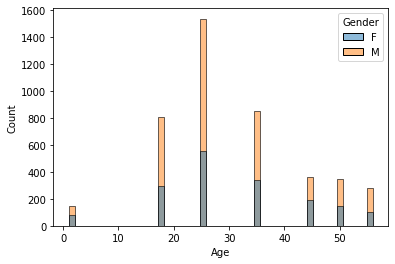

In [15]:
sns.histplot(data = users_df, x = users_df['Age'], hue = users_df['Gender'])

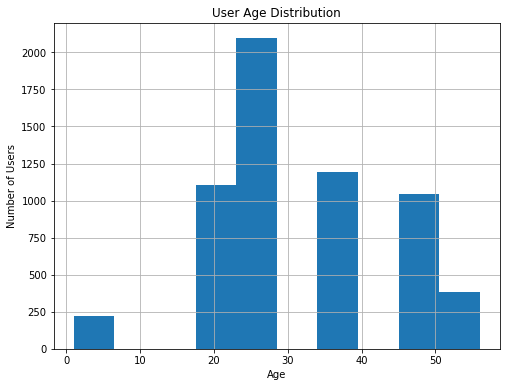

In [16]:
# user age distribution
plt.figure(figsize=(8,6))
users_df.Age.hist()
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

Text(0.5, 1.0, 'Movie Rating Distribution')

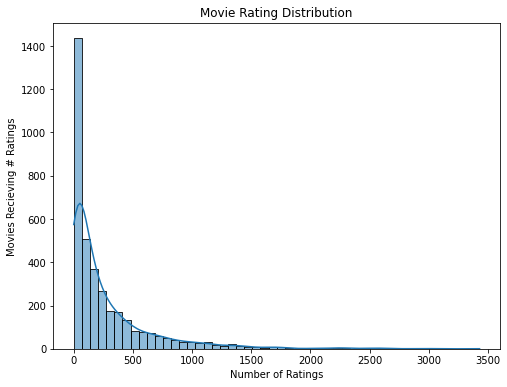

In [17]:
ratings_mean_count = pd.DataFrame(Master_Data.groupby('Title')['Rating'].mean())
ratings_mean_count['Rating_Counts'] = pd.DataFrame(Master_Data.groupby('Title')['Rating'].count())

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.histplot(data=ratings_mean_count, x="Rating_Counts", kde=True, bins = 50)
plt.xlabel('Number of Ratings')
plt.ylabel('Movies Recieving # Ratings')
plt.title('Movie Rating Distribution')

<Figure size 576x432 with 0 Axes>

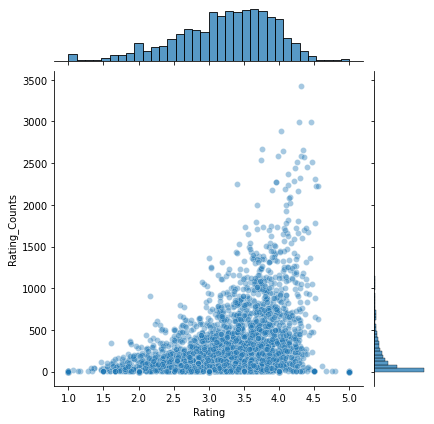

In [18]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='Rating_Counts', data=ratings_mean_count, alpha=0.4)

# Implicit Data - Alternating Least Squares

## Loading Data

In [19]:
#!apt install cuda
!pip install implicit

     |████████████████████████████████| 686 kB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 8.4 MB/s  eta 0:00:01
  Using cached importlib_resources-5.4.0-py3-none-any.whl (28 kB)


In [20]:
import os
import sys
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix, save_npz, load_npz, vstack, hstack, lil_matrix
import implicit
import pickle
from implicit.evaluation import train_test_split, precision_at_k, mean_average_precision_at_k

In [21]:
def load_data():
    '''load the MovieLens 1m dataset in a Pandas dataframe'''
    ratings = pd.read_csv(path_to_data + 'ratings.dat', delimiter='::', header=None, 
        names=['user_id', 'movie_id', 'rating', 'timestamp'], 
        usecols=['user_id', 'movie_id', 'rating'], engine='python')

    return ratings

## Create Sparse User-Item and Item_User Matrix

Create a sparse user-item and item-user matrix for input to ALS. Need to convert the explicit ratings to implicit feedback using a scalar-value - trying 40.

The Scipy sparse matrix format is csr_matrix((data), (rows, cols))

we’ll simply binarize the ratings and convert them to ‘1’ (i.e. positive class). The value of ‘1’ represents that the user has interacted with the item. However, we also require negative samples to train our models, to indicate movies that the user has not interacted with. We assume that such movies are those that the user are not interested in — this is a sweeping assumption

In [23]:
path_to_output = 'Outputs/'

In [24]:
def sparse_matrices(df):
    '''creates the sparse user-item and item-user matrices'''

    # using a scalar value (40) to convert ratings from a scale (1-5) to a view (1)
    alpha = 40

    sparse_user_item = csr_matrix(([alpha]*len(df['movie_id']), (df['user_id'], df['movie_id'])))
    # transposing the item-user matrix to create a user-item matrix
    sparse_item_user = sparse_user_item.T.tocsr()
    # save the matrices for recalculating user on the fly 
    save_npz(path_to_output + "sparse_user_item.npz", sparse_user_item)
    save_npz(path_to_output + "sparse_item_user.npz", sparse_item_user)

    return sparse_user_item, sparse_item_user

It is important to note that using implicit feedback reframes the problem that our recommender is trying to solve. Instead of trying to predict movie ratings when using explicit feedback, we are trying to predict whether the user will interact (i.e. click/buy/watch) with each movie, with the aim of presenting to users the movies with the highest interaction likelihood.

## Create User and Movie Embeddings

create an embedding to map back the ratings to the *movie meta-data title and genre* and *users to their profile meta-data age-range, gender and occupation*.

In [25]:
def map_movies(movie_ids):
    '''takes a list of movie_ids and returns a list of dictionaries with movies information'''
    df = pd.read_csv(path_to_data + 'movies.dat', delimiter='::', header=None, 
        names=['movie_id', 'title', 'genre'], engine='python', encoding='latin-1')

    # add years to a new column 'year' and remove them from the movie title
    df['year'] = df['title'].str[-5:-1]
    df['title'] = df['title'].str[:-6]

    # creates an ordered list of dictionaries with the movie information for all movie_ids 
    mapped_movies = [df[df['movie_id'] == i].to_dict('records')[0] for i in movie_ids]
    
    return mapped_movies


def map_users(user_ids):
    '''takes a list of user_ids and returns a list of dictionaries with user information'''
    df = pd.read_csv(path_to_data + 'users.dat', delimiter='::', header=None, 
        names=['user_id', 'gender', 'agerange', 'occupation', 'timestamp'], engine='python')
    df = df.drop(['timestamp'], axis=1)

    mapped_users = [df[df['user_id'] == i].to_dict('records')[0] for i in user_ids]

    return mapped_users

## Calculate most similar users and items

In [26]:
def most_similar_items(item_id, n_similar=10):
    '''computes the most similar items'''
    with open(path_to_output + 'model.sav', 'rb') as pickle_in:
        model = pickle.load(pickle_in)

    similar, _ = zip(*model.similar_items(item_id, n_similar)[1:])

    return map_movies(similar)


def most_similar_users(user_id, n_similar=10):
    '''computes the most similar users'''
    sparse_user_item = load_npz(path_to_output + "sparse_user_item.npz")
    
    with open(path_to_output + 'model.sav', 'rb') as pickle_in:
        model = pickle.load(pickle_in)

    # similar users gives back [(users, scores)]
    # we want just the users and not the first one, because that is the same as the original user
    similar, _ = zip(*model.similar_users(user_id, n_similar)[1:])

    # orginal users items
    original_user_items = list(sparse_user_item[user_id].indices)

    # # this maps back user_ids to their information, which is useful for visualization
    similar_users_info = map_users(similar)
    # # now we want to add the items that a similar user has rated
    for user_info in similar_users_info:
        # we create a list of items that correspond to the similar user ids
        # then compare that in a set operation to the original user items
        # as a last step we add it as a key to the user information dictionary
        user_info['items'] = set(list(sparse_user_item[user_info['user_id']].indices)) & set(original_user_items)

    return similar_users_info

In [27]:
similar_user_info = map_users([1,2,3])
similar_user_info

[{'user_id': 1, 'gender': 'F', 'agerange': 1, 'occupation': 10},
 {'user_id': 2, 'gender': 'M', 'agerange': 56, 'occupation': 16},
 {'user_id': 3, 'gender': 'M', 'agerange': 25, 'occupation': 15}]

## Split the dataset in a train and test-set

Compute the precision and mean-average-precision evaluation metrics

In [28]:
def model():
    '''computes p@k and map@k evaluation metrics and saves model'''
    sparse_item_user = load_npz(path_to_output + "sparse_item_user.npz")

    train, test = train_test_split(sparse_item_user, train_percentage=0.8)

    # factors = 50, regularization = 0.01, iterations = 30 from microsoft paper
    #model = implicit.als.AlternatingLeastSquares(factors=100, 
        #regularization=0.1, iterations=20, calculate_training_loss=False)
    model = implicit.als.AlternatingLeastSquares(factors=50, 
        regularization=0.01, iterations=30, calculate_training_loss=False)
    model.fit(train)

    with open(path_to_output + 'model.sav', 'wb') as pickle_out:
        pickle.dump(model, pickle_out)
    
    p_at_k = precision_at_k(model, train, test, K=10)
    m_at_k = mean_average_precision_at_k(model, train, test, K=10)

    return p_at_k, m_at_k

## Recommendations

After instantiating the model we can use it to recommend movies to one or all users found in our dataset. Output for implicit.recommend() are tuples of (item_ids, scores), but we only need the item_ids and output for implicit.recommend_all() is a Numpy array that we need to add to the user DataFrame.

In [29]:
def recommend(user_id):
    '''recommend N items to user'''
    sparse_user_item = load_npz(path_to_output + "sparse_user_item.npz")

    with open(path_to_output + 'model.sav', 'rb') as pickle_in:
        model = pickle.load(pickle_in)

    recommended, _ =  zip(*model.recommend(user_id, sparse_user_item, N=5))

    return recommended, map_movies(recommended)


def recommend_all_users():
    '''recommend N items to all users'''
    sparse_user_item = load_npz(path_to_output + "sparse_user_item.npz")

    with open(path_to_output + 'model.sav', 'rb') as pickle_in:
        model = pickle.load(pickle_in)

    # numpy array with N recommendations for each user
    # remove first array, because those are the columns
    all_recommended = model.recommend_all(user_items=sparse_user_item, N=10, 
        recalculate_user=False, filter_already_liked_items=True)[1:]

    # create a new Pandas Dataframe with user_id, 10 recommendations, for all users
    df = pd.read_csv(path_to_data + 'users.dat', delimiter='::', header=None, 
        names=['user_id', 'gender', 'agerange', 'occupation', 'timestamp'], engine='python')
    df = df.drop(['gender', 'agerange', 'occupation', 'timestamp'], axis=1)
    df[['rec1', 'rec2', 'rec3', 'rec4', 'rec5', 'rec6', 'rec7', 'rec8', 'rec9', 'rec10']] = pd.DataFrame(all_recommended)
    df.to_pickle(path_to_output + "all_recommended.pkl")

    return df

we can also use the library to recommend movies on-the-fly to new users that are not included in either our sparse matrices or our model. 

since the model requires the sparse_user_item matrix as a parameter, but Scipy does not allow appending to its sparse matrices.
Instead, we need to load the sparse matrix into memory and stack a new unknown user and its implicit ratings to the data, indices and change the shape of the matrix. Stacking is done in place, so the matrix is updated immediately.

        Parameters
        ----------
        userid : Union[int, array_like]
            The userid or array of userids to calculate recommendations for
        user_items : csr_matrix
            A sparse matrix of shape (users, number_items). This lets us look
            up the liked items and their weights for the user. This is used to filter out
            items that have already been liked from the output, and to also potentially
            recalculate the user representation. Each row in this sparse matrix corresponds
            to a row in the userid parameter: that is the first row in this matrix contains
            the liked items for the first user in the userid array.
        N : int, optional
            The number of results to return
        filter_already_liked_items: bool, optional
            When true, don't return items present in the training set that were rated
            by the specified user.
        filter_items : array_like, optional
            List of extra item ids to filter out from the output
        recalculate_user : bool, optional
            When true, don't rely on stored user embeddings and instead recalculate from the
            passed in user_items. This option isn't supported by all models.
        items: array_like, optional
            Array of extra item ids. When set this will only rank the items in this array instead
            of ranking every item the model was fit for. This parameter cannot be used with
            filter_items

In [30]:
def recalculate_user(user_ratings):
    '''adds new user and its liked items to sparse matrix and returns recalculated recommendations'''

    alpha = 40
    m = load_npz(path_to_output + 'sparse_user_item.npz')
    n_users, n_movies = m.shape

    ratings = [alpha for i in range(len(user_ratings))]

    m.data = np.hstack((m.data, ratings))
    m.indices = np.hstack((m.indices, user_ratings))
    m.indptr = np.hstack((m.indptr, len(m.data)))
    m._shape = (n_users+1, n_movies)

    # recommend N items to new user
    with open(path_to_output + 'model.sav', 'rb') as pickle_in:
        model = pickle.load(pickle_in)
    recommended, _ =  zip(*model.recommend(n_users, m, recalculate_user=True))
    
    return recommended, map_movies(recommended)

## Vanilla Matrix Completion

In [42]:
import tensorflow as tf
import numpy as np

# Build the factorization network.
class KerasMF:

    def __init__(self, R, k=3, l2=1e-4, with_bias=False):
        self.l2_reg = tf.keras.regularizers.l2(l2)
        self.m, self.n = R.shape
        self.k = k
        self.with_bias = with_bias
        self.model = self.create_model()

    def create_model(self):
        user_inputs = tf.keras.layers.Input(shape=(1,), name="user")
        item_inputs = tf.keras.layers.Input(shape=(1,), name="item")
        user_embeddings = tf.keras.layers.Embedding(
        input_dim=self.m, output_dim=self.k, name="user_embedding",
        embeddings_regularizer=self.l2_reg)(user_inputs)
        item_embeddings = tf.keras.layers.Embedding(
        input_dim=self.n, output_dim=self.k, name="item_embedding",
        embeddings_regularizer=self.l2_reg)(item_inputs)
        dots = tf.keras.layers.Dot(axes=-1, name="logits")([user_embeddings, item_embeddings])
        if self.with_bias:
        # The formal use of bias need a tf.keras.layers.Dense layer.
        # But since we are customizing our network architecture,
        # we will use the tf.keras.layers.Embedding layer to do the trick.
            user_biases = tf.keras.layers.Embedding(input_dim=self.m, output_dim=1, name="user_bias")(user_inputs)
            item_biases = tf.keras.layers.Embedding(
            input_dim=self.n, output_dim=1, name="item_bias")(item_inputs)
            dots = tf.keras.layers.Add()([dots, user_biases, item_biases])
        model = tf.keras.Model(
        name="matrix_factorizer",
        inputs=[user_inputs, item_inputs], outputs=dots)
        model.compile(
        optimizer=tf.keras.optimizers.SGD(),
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[
        tf.keras.metrics.MeanSquaredError()
        ]
        )
        print(model.summary())
        return model

/opt/anaconda3/envs/GNN_recommender/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/GNN_recommender/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/GNN_recommender/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/GNN_recommender/lib/pyt

In [36]:
# print(movie_ratings_users_df.columns)
tf.compat.v1.enable_eager_execution()
ratings = movie_ratings_users_df.pivot(index='MovieID', columns='UserID', values='Rating')
ratings = ratings.fillna(0.0)
print(ratings.isna().sum().sum()/float(ratings.shape[0]*ratings.shape[1]))
print(ratings.head())
ratings = ratings.values
ratings = np.nan_to_num(ratings)

keras_mf = KerasMF(R=ratings,k=10, with_bias=True)
R_u, R_i = ratings.nonzero()
R_s = ratings[ratings.nonzero()]
R_s=np.asarray(R_s).astype(np.float)
R_i = np.asarray(R_i).astype(np.float)
R_u=np.asarray(R_u).astype(np.float)

print(R_u.shape)
print(R_i.shape)

train_data = tf.data.Dataset.from_tensor_slices(({"user": R_u, "item": R_i}, R_s))
train_data = train_data.shuffle(buffer_size=1000).repeat(count=None).batch(1)
keras_mf.model.fit(train_data, epochs=75, steps_per_epoch=1000, verbose=1)
keras_preds = keras_mf.model.predict({"user": R_u, "item": R_i})
diff = 0
for i in np.stack([np.squeeze(keras_preds),
               ratings[ratings.nonzero()]], axis=1):
    diff += abs(i[0] - i[1])

keras_user_embeddings = keras_mf.model.get_layer(name="user_embedding").weights[0].numpy()
keras_item_embeddings = keras_mf.model.get_layer(name="item_embedding").weights[0].numpy()
dots = keras_user_embeddings.dot(keras_item_embeddings.T)
print(np.round(dots, 2).shape)
print(np.round(dots,2))
print(diff)

0.0
UserID   1     2     3     4     5     6     7     8     9     10    ...  \
MovieID                                                              ...   
1         5.0   0.0   0.0   0.0   0.0   4.0   0.0   4.0   5.0   5.0  ...   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   5.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0  ...   
5         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

UserID   6031  6032  6033  6034  6035  6036  6037  6038  6039  6040  
MovieID                                                              
1         0.0   4.0   0.0   0.0   4.0   0.0   0.0   0.0   0.0   3.0  
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3         0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  
4         0.0   0.0   0.0   0.0   2.0   2.0   0.0   0.0   0.0   0.0  
5         0.0   0.0   0.0   0.0   1.0   0.0

## Testing ALS

In [31]:
ratings = load_data()

sparse_user_item, sparse_item_user = sparse_matrices(ratings)

p_at_k, m_at_k = model()

/opt/anaconda3/envs/GNN_recommender/lib/python3.6/site-packages/implicit/utils.py:27: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  "OpenBLAS detected. Its highly recommend to set the environment variable "


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/3472 [00:00<?, ?it/s]

  0%|          | 0/3472 [00:00<?, ?it/s]

In [32]:
p_at_k

0.22586477451047282

In [33]:
m_at_k

0.10707014455274344

In [34]:
from implicit.evaluation import precision_at_k, mean_average_precision_at_k, ndcg_at_k, train_test_split
from implicit.als import AlternatingLeastSquares
from implicit.datasets.movielens import get_movielens

movies, ratings = get_movielens("1m")
train, test = train_test_split(ratings)

model = AlternatingLeastSquares(factors=128, regularization=20, iterations=15)
model.fit(train)

p = precision_at_k(model, train, test, K=10, num_threads=4)
print('precision at k is: ', p)
map = mean_average_precision_at_k(model, train, test, K=10, num_threads=4)
print('mean average precision at k is: ', map)
ndcg = ndcg_at_k(model, train, test, K=10, num_threads=4)
print('ndcg at k is: ', ndcg)

0.00B [00:00, ?B/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/3461 [00:00<?, ?it/s]

precision at k is:  0.37779145720050616


  0%|          | 0/3461 [00:00<?, ?it/s]

mean average precision at k is:  0.23537373830769767


  0%|          | 0/3461 [00:00<?, ?it/s]

ndcg at k is:  0.3563855708733765


"Precision at k" corresponds to the number of relevant results among the top 10 retrieved documents), but fails to take into account the positions of the relevant documents among the top k

"MAP at k" computes the mean of the Average Precision (AP) over all the users for a recommendation system.
MAP rewards first-loaded relevant recommendations.

However, the MAP@K metric has some shortcomings. The MAP@K metric focuses on precision – which of the recommended items are relevant and which are not. It does not take into account how relevant the recommended results are.

NDCG@K ("normalized discounted cumulative gain at k"): while the earlier metrics look at just the presence of an item in the test set, these items might not all be as good, with some of them having higher observed values than others. NDCG aims at judging these values, but discounted according to the rank in the top-K list.

What is Gain?

Gain is just the relevance score for each item recommended.

What is cumulative gain?

Cumulative gain at K is the sum of gains of the first K items recommended.

$$
CG_{@K}=\sum_{i=1}^K G_i
$$

Note that this still does not take into account the ordering of the items.

What is discounted cumulative gain?

Discounted cumulative gain weighs each relevance score based on its position. The recommendations at the top get a higher weight while the relevance of those at the bottom get a lower weight.

$$
DCG_{@K}=\sum_{i=1}^K \frac{G_i}{log_2 (i+1)}
$$
Note that the denominator is $log(i+1)$ giving more weightage to items recommended at the top.

The DCG has one shortcoming: The score is dependent on the number of items recommended. If we have two recommenders that are recommending a different number of items, it is hard to compare the DCG score. The recommender with more items is likely to have a higher score.

What is the NDCG Metric ?

The normalized discounted cumulative gain is the DCG with a normalization factor in the denominator.
